<a href="https://colab.research.google.com/github/PrithviVegesna/College-Recommendation/blob/main/Load_diabetes_Linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8, random_state = 4)


print(X_test.shape)










(89, 10)


In [208]:
#device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

class LinearModel01(nn.Module):

  def __init__(self, input_features, output_features):

    super().__init__()

    self.Linear1 = nn.Linear(input_features, 4)

    self.Linear4 = nn.Linear(4, output_features)



  def forward(self, x):

    x = self.Linear1(x)

    x = torch.relu(x)

    x = self.Linear4(x)

    return x

input_features = X.shape[1]

output_features = 1

model = LinearModel01(input_features, output_features).to(device)

In [209]:
#Here is the training loop/visualization

L1loss = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = 900

losses = []


for epoch in range(epochs):



  model.train()


  #forward pass

  y_preds = model(X_train)

  loss = L1loss(y_preds, y_test)

  if float

  losses.append(float(loss))


  #optimizer step

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()  # switch to evaluation mode

  with torch.inference_mode():
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epoch}], Loss: {loss:.4f}")


Epoch [10/9], Loss: 24548.5625
Epoch [20/19], Loss: 18201.7988
Epoch [30/29], Loss: 13964.6504
Epoch [40/39], Loss: 11135.8965
Epoch [50/49], Loss: 9247.3975
Epoch [60/59], Loss: 7986.6206
Epoch [70/69], Loss: 7144.9155
Epoch [80/79], Loss: 6582.9873
Epoch [90/89], Loss: 6207.8384
Epoch [100/99], Loss: 5957.3872
Epoch [110/109], Loss: 5790.1836
Epoch [120/119], Loss: 5678.5571
Epoch [130/129], Loss: 5604.0352
Epoch [140/139], Loss: 5554.2827
Epoch [150/149], Loss: 5521.0669
Epoch [160/159], Loss: 5498.8931
Epoch [170/169], Loss: 5484.0889
Epoch [180/179], Loss: 5474.2056
Epoch [190/189], Loss: 5467.6074
Epoch [200/199], Loss: 5463.2026
Epoch [210/209], Loss: 5460.2622
Epoch [220/219], Loss: 5458.2988


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([89])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [230/229], Loss: 5456.9873
Epoch [240/239], Loss: 5456.1133
Epoch [250/249], Loss: 5455.5288
Epoch [260/259], Loss: 5455.1387
Epoch [270/269], Loss: 5454.8789
Epoch [280/279], Loss: 5454.7051
Epoch [290/289], Loss: 5454.5889
Epoch [300/299], Loss: 5454.5112
Epoch [310/309], Loss: 5454.4595
Epoch [320/319], Loss: 5454.4248
Epoch [330/329], Loss: 5454.4014
Epoch [340/339], Loss: 5454.3862
Epoch [350/349], Loss: 5454.3765
Epoch [360/359], Loss: 5454.3696
Epoch [370/369], Loss: 5454.3647
Epoch [380/379], Loss: 5454.3618
Epoch [390/389], Loss: 5454.3594
Epoch [400/399], Loss: 5454.3584
Epoch [410/409], Loss: 5454.3569
Epoch [420/419], Loss: 5454.3564
Epoch [430/429], Loss: 5454.3560
Epoch [440/439], Loss: 5454.3564
Epoch [450/449], Loss: 5454.3555
Epoch [460/459], Loss: 5454.3560
Epoch [470/469], Loss: 5454.3560
Epoch [480/479], Loss: 5454.3555
Epoch [490/489], Loss: 5454.3555
Epoch [500/499], Loss: 5454.3555
Epoch [510/509], Loss: 5454.3555
Epoch [520/519], Loss: 5454.3555
Epoch [530

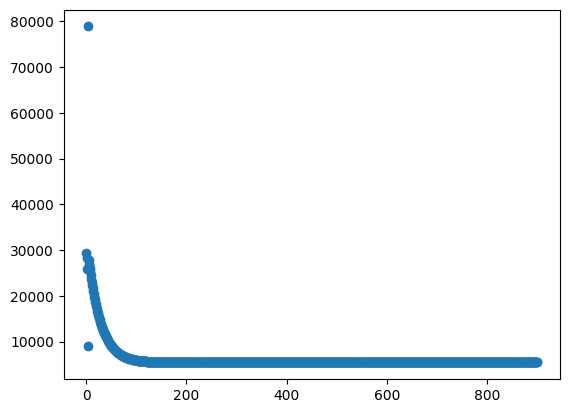

In [210]:
epochNumpy = [i for i in range(900)]

losses = np.array(losses)

plt.scatter(epochNumpy, losses)



In [211]:
y_pred_test = model(X_test)

y_pred_test = y_pred_test.detach().numpy()

y_test = np.array(y_test)

In [212]:
import statistics

model.eval()

with torch.inference_mode():


  def accuracy(y_true, y_pred_test):
      losses = []
      for i in range(len(y_true)):
          losses.append(abs(float(y_true[i]) - float(y_pred_test[i])))
      return statistics.mean(losses)


  print(accuracy(y_test, y_pred_test))

62.046167780844016


/tmp/ipython-input-779862223.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses.append(abs(float(y_true[i]) - float(y_pred_test[i])))
